# Predicting Electricity Consumption

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_pickle("dataset/dataset.pickle")

In [4]:
data.head()

,CorumTemp,SamsunTemp,OrduTemp,AmasyaTemp,SinopTemp,Cons
Date,,,,,,
2017-02-01 00:00:00,-9.0,-4.0,-4.000000,-7.0,NaN,600.314744
2017-02-01 01:00:00,-10.0,-4.0,-4.333333,-8.5,NaN,541.667988
2017-02-01 02:00:00,-10.0,-1.0,-4.666667,-9.0,NaN,511.646533
2017-02-01 03:00:00,-11.0,-1.0,-5.000000,-8.5,NaN,483.191967
2017-02-01 04:00:00,-12.0,-2.0,-4.333333,-8.5,NaN,468.383920


### 1-) Data Preprocessing

- Performing the analysis on **Samsun and Corum**, so created invidual consuming features for each city (considering their correlation coefficient)
- **SamsunCons** , **CorumCons** and **TotalCons** featured are created.
- Dropped other columns

In [4]:
data.corr()

,CorumTemp,SamsunTemp,OrduTemp,AmasyaTemp,SinopTemp,Cons
CorumTemp,1.000000,0.882846,0.882230,0.961119,0.843373,0.257719
SamsunTemp,0.882846,1.000000,0.952113,0.896859,0.941260,0.205156
OrduTemp,0.882230,0.952113,1.000000,0.878618,0.936133,0.128754
AmasyaTemp,0.961119,0.896859,0.878618,1.000000,0.837155,0.285195
SinopTemp,0.843373,0.941260,0.936133,0.837155,1.000000,0.109661
Cons,0.257719,0.205156,0.128754,0.285195,0.109661,1.000000


In [5]:
#  Calculated approximately electricity consumption of Samsun and Corum
data['CorumCons'] = data['Cons'].apply(lambda x : 0.257719*x)
data['SamsunCons'] = data['Cons'].apply(lambda x : 0.205156*x)

In [6]:
data['TotalCons'] = data['SamsunCons'] + data['CorumCons']

In [7]:
data.drop(['OrduTemp', 'AmasyaTemp', 'SinopTemp', 'Cons'], axis=1, inplace =True)

In [8]:
data.head()

,CorumTemp,SamsunTemp,CorumCons,SamsunCons,TotalCons
Date,,,,,
2017-02-01 00:00:00,-9.0,-4.0,154.712516,123.158172,277.870687
2017-02-01 01:00:00,-10.0,-4.0,139.598132,111.126438,250.724570
2017-02-01 02:00:00,-10.0,-1.0,131.861033,104.967356,236.828389
2017-02-01 03:00:00,-11.0,-1.0,124.527751,99.129731,223.657482
2017-02-01 04:00:00,-12.0,-2.0,120.711435,96.091771,216.803207


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CorumTemp,36888.0,11.699170,9.692756,-17.000000,3.666667,11.333333,19.500000,43.000000
SamsunTemp,36888.0,15.568030,7.497786,-7.000000,10.000000,15.000000,22.000000,36.000000
CorumCons,36888.0,162.857064,31.301210,75.529006,134.363587,167.262982,187.085180,242.024046
SamsunCons,36888.0,129.641601,24.917182,60.124511,106.959502,133.148912,148.928279,192.662105
TotalCons,36888.0,292.498665,56.218392,135.653517,241.323089,300.411894,336.013459,434.686151


### 2-) EDA Part

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'MW')

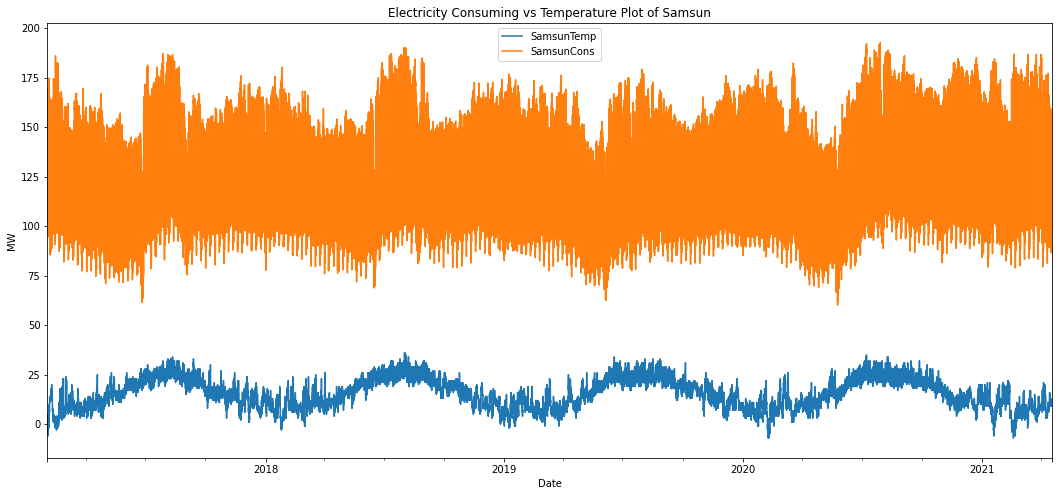

In [12]:
data[['SamsunTemp', 'SamsunCons']].plot(title = 'Electricity Consuming vs Temperature Plot of Samsun', figsize= (18,8))
plt.ylabel('MW')

Text(0, 0.5, 'MW')

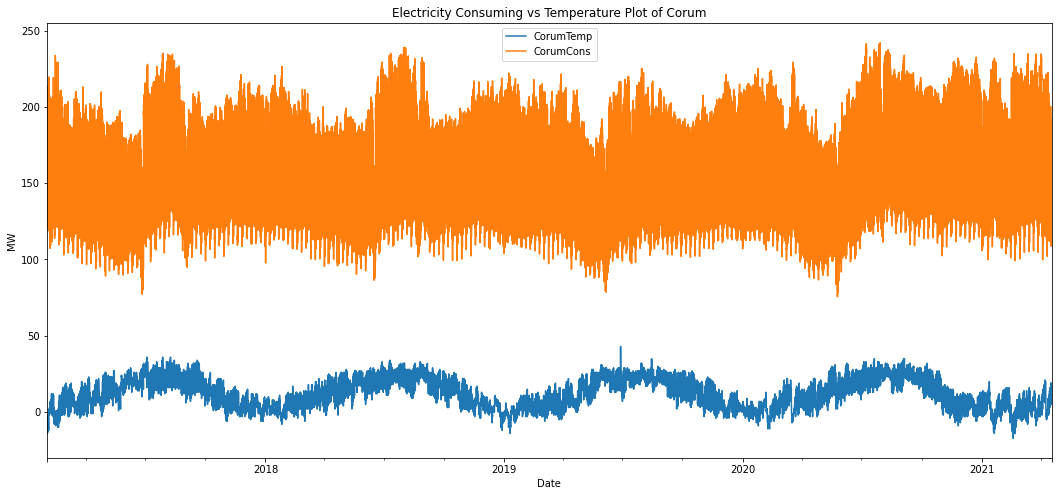

In [307]:
data[['CorumTemp', 'CorumCons']].plot(title = 'Electricity Consuming vs Temperature Plot of Corum', figsize= (18,8))
plt.ylabel('MW')

<AxesSubplot:xlabel='Date', ylabel='TotalCons'>

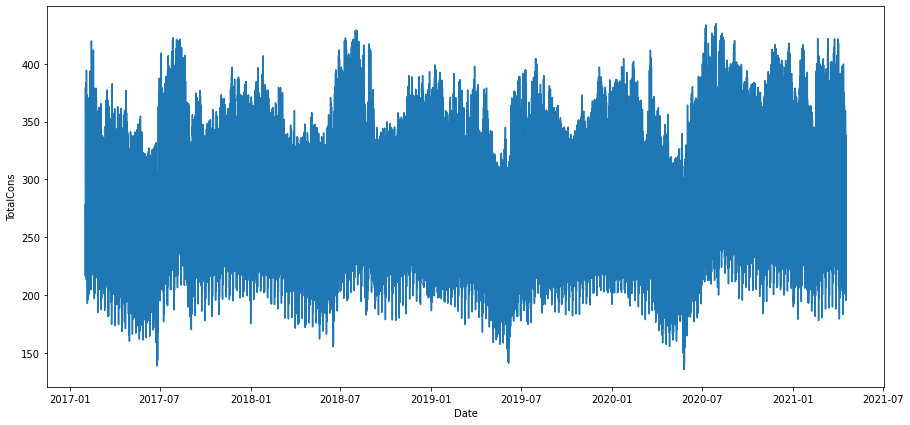

In [426]:
plt.figure(figsize = (15,7))
sns.lineplot(data.index, data['TotalCons'])

- We can clearly see that at the Peak points of temperature, electricity consumed high level for both city.
- On the other hand, there seems like negatively relationship between electricity and temperature **until a temperature limit (peaks).**  Whenever one is increasing the other one is decreasing.
- The data show **strong seasonality** within each year. There is no cyclic behavior and no trend.

In [10]:
df = data.copy()

In [11]:
df["year"] = df.index.year
df["quarter"] = df.index.quarter
df["month"] = df.index.month
df["week"] = df.index.week
df["day"] = df.index.weekday # 0:monday 
df['hour'] = df.index.hour

In [12]:
df.head()

,CorumTemp,SamsunTemp,CorumCons,SamsunCons,TotalCons,year,quarter,month,week,day,hour
Date,,,,,,,,,,,
2017-02-01 00:00:00,-9.0,-4.0,154.712516,123.158172,277.870687,2017,1,2,5,2,0
2017-02-01 01:00:00,-10.0,-4.0,139.598132,111.126438,250.724570,2017,1,2,5,2,1
2017-02-01 02:00:00,-10.0,-1.0,131.861033,104.967356,236.828389,2017,1,2,5,2,2
2017-02-01 03:00:00,-11.0,-1.0,124.527751,99.129731,223.657482,2017,1,2,5,2,3
2017-02-01 04:00:00,-12.0,-2.0,120.711435,96.091771,216.803207,2017,1,2,5,2,4


In [360]:
df.groupby("qtr")["SamsunCons"].mean()

qtr
1    130.122772
2    122.362981
3    135.815936
4    130.453850
Name: SamsunCons, dtype: float64

In [361]:
df.groupby("qtr")["CorumCons"].mean()

qtr
1    163.461515
2    153.713589
3    170.613324
4    163.877419
Name: CorumCons, dtype: float64

In [362]:
df.groupby("qtr")["TotalCons"].mean()

qtr
1    293.584287
2    276.076570
3    306.429260
4    294.331269
Name: TotalCons, dtype: float64

- We observe that there are **maximum and minimum average electricity consumptions** in the second (spring) and third (summer) quarters of the years.

Text(0, 0.5, 'Electricity Consumption')

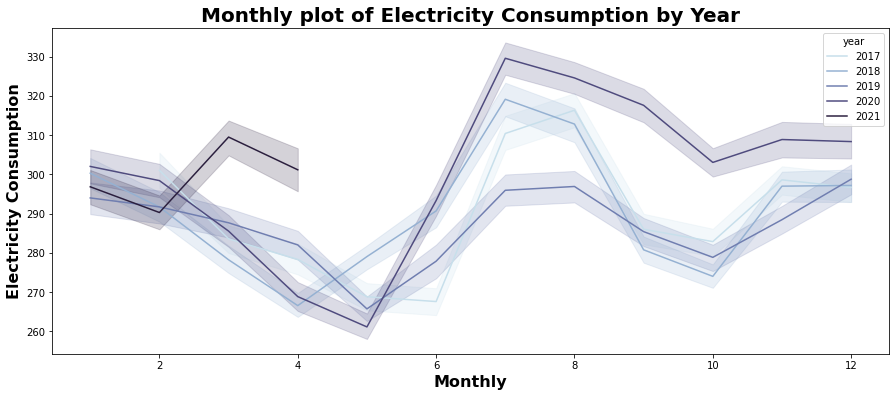

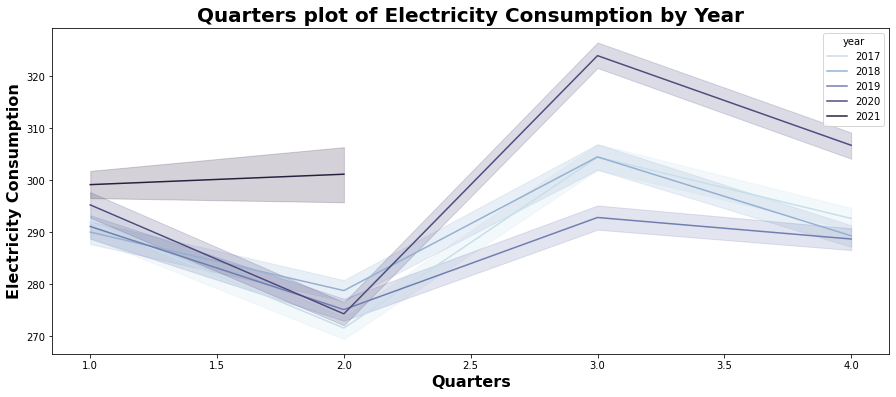

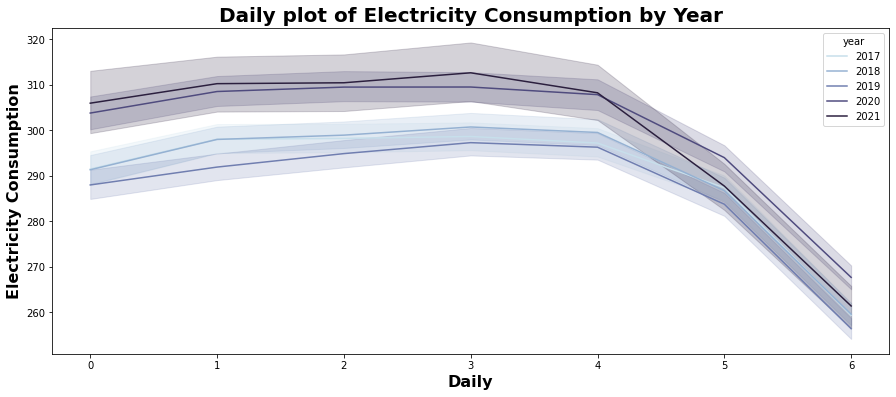

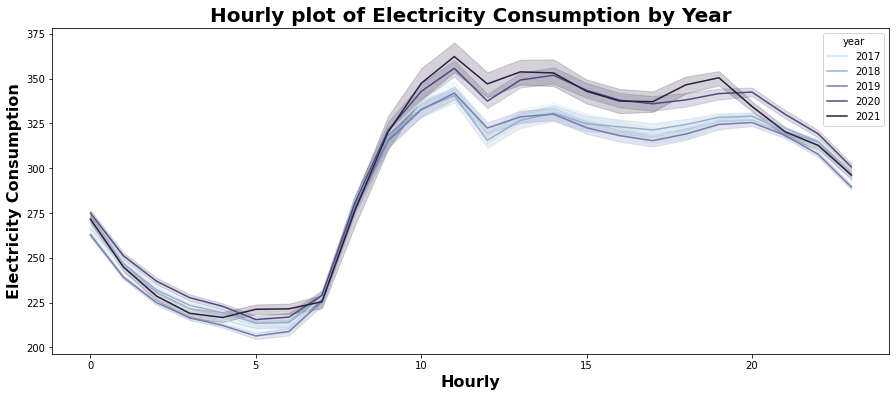

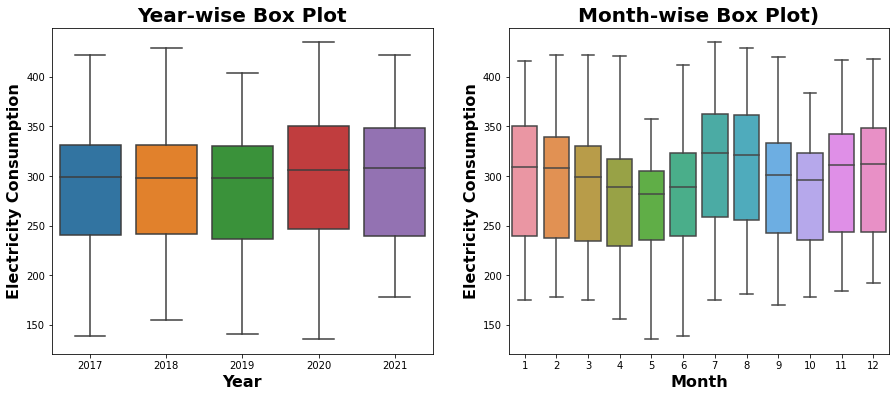

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.lineplot(df['month'], df['TotalCons'], hue=df['year'], palette=palette)
ax.set_title('Monthly plot of Electricity Consumption by Year', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Monthly', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Electricity Consumption', fontsize = 16, fontdict=dict(weight='bold'))

fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.lineplot(df['qtr'], df['TotalCons'], hue=df['year'], palette=palette)
ax.set_title('Quarters plot of Electricity Consumption by Year', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Quarters', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Electricity Consumption', fontsize = 16, fontdict=dict(weight='bold'))

fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.lineplot(df['day'], df['TotalCons'], hue=df['year'], palette=palette)
ax.set_title('Daily plot of Electricity Consumption by Year', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Daily', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Electricity Consumption', fontsize = 16, fontdict=dict(weight='bold'))

fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.lineplot(df['hour'], df['TotalCons'], hue=df['year'], palette=palette)
ax.set_title('Hourly plot of Electricity Consumption by Year', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Hourly', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Electricity Consumption', fontsize = 16, fontdict=dict(weight='bold'))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(df['year'], df['TotalCons'], ax=ax[0])
ax[0].set_title('Year-wise Box Plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Electricity Consumption', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(df['month'], df['TotalCons'], ax=ax[1])
ax[1].set_title('Month-wise Box Plot', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Electricity Consumption', fontsize = 16, fontdict=dict(weight='bold'))

### 3-) Feature Engineering Part

- I will be focusing on Total Consumption of Samsun and Corum, so dropping uncessary columns for this purpose.

In [13]:
df2 = df.copy()
df2.drop(['CorumTemp', 'SamsunTemp', 'CorumCons', 'SamsunCons'], axis=1, inplace=True)

In [14]:
df2.head()

,TotalCons,year,quarter,month,week,day,hour
Date,,,,,,,
2017-02-01 00:00:00,277.870687,2017,1,2,5,2,0
2017-02-01 01:00:00,250.724570,2017,1,2,5,2,1
2017-02-01 02:00:00,236.828389,2017,1,2,5,2,2
2017-02-01 03:00:00,223.657482,2017,1,2,5,2,3
2017-02-01 04:00:00,216.803207,2017,1,2,5,2,4


#### Split the data as Train and Test

In [15]:
split_date = '2020-04-01'
df_train = df2.loc[df2.index <= split_date].copy()
df_test = df2.loc[df2.index > split_date].copy()

In [16]:
df_train.shape , df_test.shape

((27721, 7), (9167, 7))

In [17]:
df_train.head()

,TotalCons,year,quarter,month,week,day,hour
Date,,,,,,,
2017-02-01 00:00:00,277.870687,2017,1,2,5,2,0
2017-02-01 01:00:00,250.724570,2017,1,2,5,2,1
2017-02-01 02:00:00,236.828389,2017,1,2,5,2,2
2017-02-01 03:00:00,223.657482,2017,1,2,5,2,3
2017-02-01 04:00:00,216.803207,2017,1,2,5,2,4


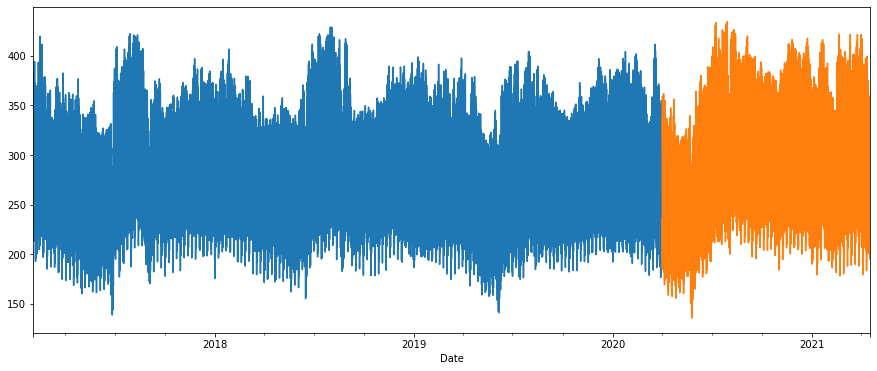

In [396]:
# Train-Test split plot
plt.figure(figsize = (15,6))
df_train['TotalCons'].plot() # 2017-02-01 00:00:00 to 2020-04-01 00:00:00
df_test['TotalCons'].plot()  # 2020-04-01 01:00:00 to 2021-04-17 23:00:00
plt.show()

#### Creating New Features and Checking Correlations with Target Feature ( TotalCons )

In [18]:
def new_features(df, label=None):
    features = []
    laglength = 24 #forecasting periods

    for t in range(1,laglength+1):
        df["Cons" + str(t) + "_hrs_lag"] = df.TotalCons.shift(t)
        features.append("Cons" + str(t) + "_hrs_lag")

    for t in [6, 12, 24]:
        
        df[["Cons" + str(t) + "_hrs_mean", "Cons" + str(t) + "_hrs_std", "Cons" + str(t) + "_hrs_min" ,"Cons" + str(t) + "_hrs_max"]] = df.TotalCons.rolling(t).agg([np.mean, np.std, np.min, np.max])
        features.append("Cons" + str(t) + "_hrs_mean")
        features.append("Cons" + str(t) + "_hrs_std")
        features.append("Cons" + str(t) + "_hrs_min")
        features.append("Cons" + str(t) + "_hrs_max")

    month = pd.get_dummies(df.month,
                                  prefix="month",
                                  drop_first=False)
    month.index = df.index
    df = pd.concat([df, month], axis=1)

    day = pd.get_dummies(df.day,
                                  prefix="day",
                                  drop_first=False)
    day.index = df.index
    df = pd.concat([df, day], axis=1)
    
    features = features + month.columns.values.tolist() + day.columns.values.tolist()
    
    X = df[features]

    if label:
        y = df[label]
        return X, y
    return X

In [19]:
X_train, y_train = new_features(df_train, label='TotalCons')
X_test, y_test = new_features(df_test, label='TotalCons')
# drop NaN values from new features
Train = pd.concat([X_train , y_train], axis=1).dropna()
Test = pd.concat([X_test , y_test], axis=1).dropna()

In [20]:
 Train.shape, Test.shape

((27697, 56), (9143, 56))

In [21]:
corr_features = Train[["TotalCons","Cons1_hrs_lag", "Cons3_hrs_lag", "Cons5_hrs_lag", "Cons10_hrs_lag" ,"Cons12_hrs_lag",
                        "Cons16_hrs_lag", "Cons20_hrs_lag", "Cons24_hrs_lag", "Cons6_hrs_mean", "Cons12_hrs_mean","Cons24_hrs_mean"]]

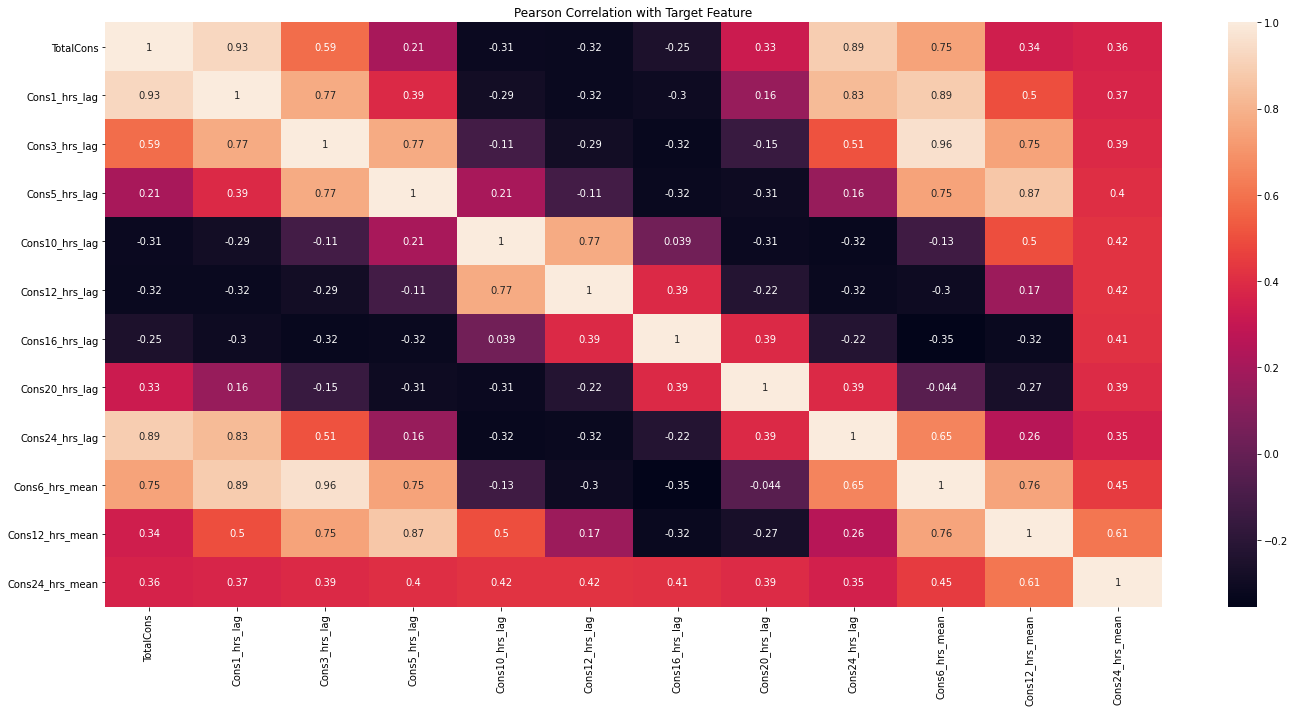

In [20]:
# Calculate correlation matrix
corr = corr_features.corr()
# Plot heatmap of correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True)
plt.title("Pearson Correlation with Target Feature")
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

- There are some features that are quite strongly linearly correlated with target, like **Cons1_hrs_lag**, **Cons24_hrs_lag** and **Cons6_hrs_mean**

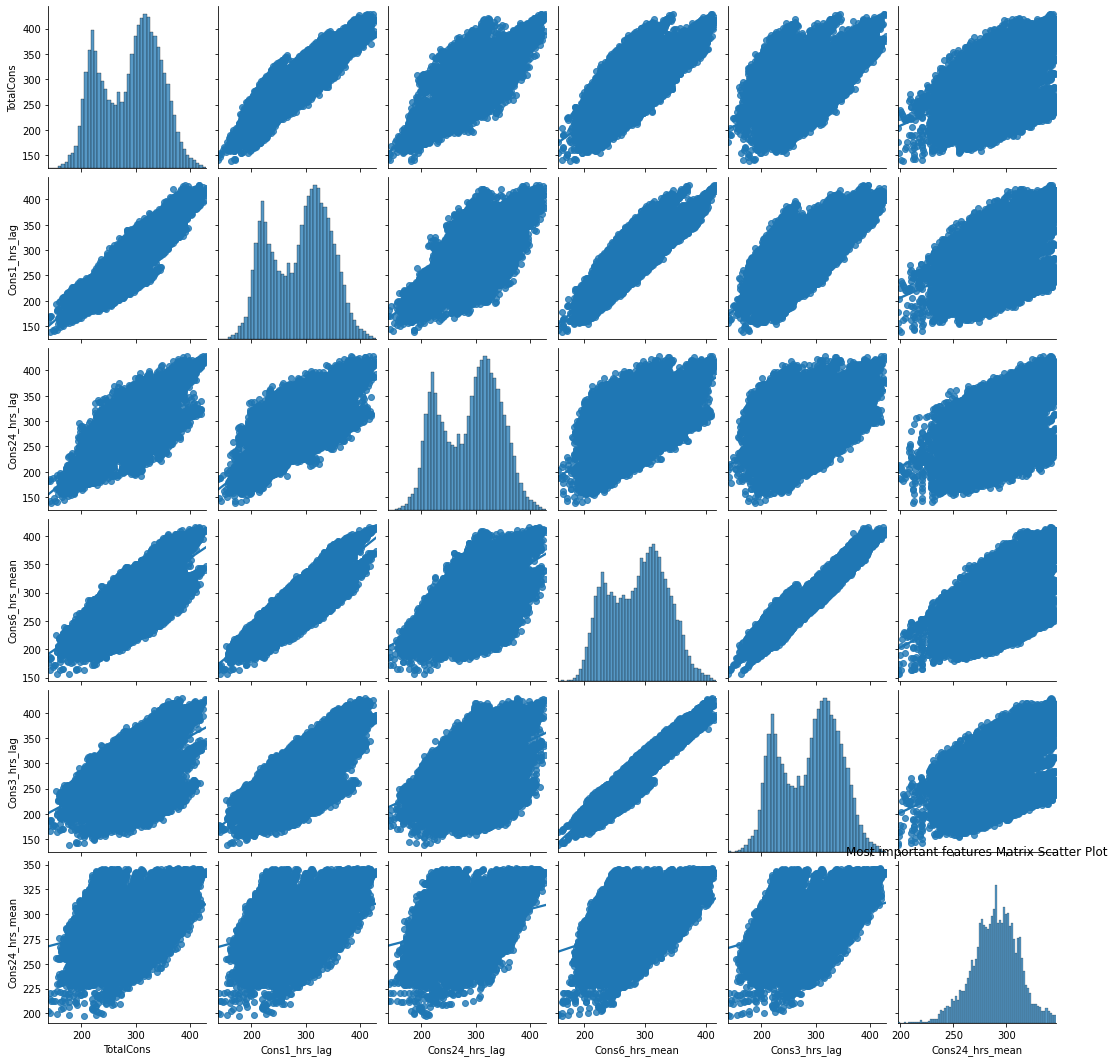

In [253]:
#Top 5 most correlated features with target
top5_mostCorrFeats = corr["TotalCons"].apply(abs).sort_values(ascending=False).index.values[:6]
sns.pairplot(data=corr_features[top5_mostCorrFeats].dropna(), kind="reg")
plt.title("Most important features Matrix Scatter Plot")
plt.show()

-  24 hours lag, 3 hours lag , 5 hours lag will be dropped for **Multicollineartiy**.

In [22]:
Train = Train.drop(['Cons24_hrs_lag', 'Cons3_hrs_lag', 'Cons5_hrs_lag'], axis=1)

In [23]:
Test = Test.drop(['Cons24_hrs_lag', 'Cons3_hrs_lag', 'Cons5_hrs_lag' ], axis=1)

In [24]:
Train.shape , Test.shape

((27697, 53), (9143, 53))

### 4-) Model Building 

#### Creating validation set beside train and test

In [25]:
split_date_validation = Train['2019-01-01' : '2020-01-01']

X_val = split_date_validation.drop(['TotalCons'],axis=1).copy()
y_val = split_date_validation.TotalCons.copy()

Val = pd.concat([X_val, y_val], axis=1) # 2019-01-01 00:00:00 to 2020-01-01 23:00:00

In [26]:
Train.shape ,  Val.shape , Test.shape

((27697, 53), (8784, 53), (9143, 53))

In [27]:
X_val.shape , y_val.shape

((8784, 52), (8784,))

In [28]:
X_train = Train.drop(['TotalCons'],axis=1)
y_train = Train.TotalCons

X_train.shape, y_train.shape

((27697, 52), (27697,))

In [29]:
X_test = Test.drop(['TotalCons'],axis=1)
y_test = Test.TotalCons

X_test.shape, y_test.shape

((9143, 52), (9143,))

#### Modelling with Lightgbm and XGBoost Algorithm

##### MAPE Function

In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

##### a-) LightGBM

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train , y_train)

LGBMRegressor()

In [442]:
lgb_pred=lgb_model.predict(X_val)

In [443]:
print('Rsquare score :',r2_score(y_val,lgb_pred)) #R^2 for validation set
print('MAPE for validation set :',mean_absolute_percentage_error(y_val,lgb_pred)) 

Rsquare score : 0.994633589178118
MAPE for validation set : 0.9820392321278864


In [444]:
lgb_pred=lgb_model.predict(X_test)

In [445]:
print('Rsquare score :',r2_score(y_test,lgb_pred)) #R^2 for validation set
print('MAPE for validation set :',mean_absolute_percentage_error(y_test,lgb_pred)) 

Rsquare score : 0.9868345691880717
MAPE for validation set : 1.5469385424729927


- **Lightgbm** Without any hyperparameter tuning: 
    - **MAPE score of Validation set :** 0.98
    - **MAPE score of Test set :** 1,54

##### b-) XGBoost

In [32]:
import xgboost as xgb

xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [352]:
xgb_pred=xgb_model.predict(X_val)

In [353]:
print('Rsquare score :' ,r2_score(y_val, xgb_pred)) #R^2 for validation set
print('MAPE for validation set :',mean_absolute_percentage_error(y_val,xgb_pred)) 

Rsquare score : 0.9974309482290714
MAPE for validation set : 0.6999399198101337


In [354]:
xgb_pred=xgb_model.predict(X_test)

In [355]:
print('Rsquare score :' ,r2_score(y_test, xgb_pred)) #R^2 for validation set
print('MAPE for validation set :',mean_absolute_percentage_error(y_test,xgb_pred)) 

Rsquare score : 0.9878082106246803
MAPE for validation set : 1.474114047910308


- **XGBoost** Without any hyperparameter tuning: 
    - **MAPE score of Validation set :** 0.69
    - **MAPE score of Test set :** 1,47

#### Model Tuning with RandomSearchCV

In [33]:
from sklearn.model_selection import RandomizedSearchCV

def find_best_model_using_randomsearchcv(X,y):
    algos = {
        'LGBMRegressor' : {
            'model': LGBMRegressor(),
            'params': {
                'num_leaves' : [2**np.arange(3,8)-3 , 80, 90, 100],
                'max_depth' : np.arange(2,14,2)
            }
        },
         'xgb': {
            'model': xgb.XGBRegressor(),
            'params': {
                'max_depth' : [3, 5, 7]
            }
        }
    }
    
    scores = []
    for algo_name, config in algos.items():
        model_selection =  RandomizedSearchCV(config['model'], config['params'], cv=5, return_train_score=False)
        model_selection.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': model_selection.best_score_,
            'best_params': model_selection.best_params_
        })
         
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [311]:
outcome = find_best_model_using_randomsearchcv(X = X_val, y = y_val)

In [312]:
outcome

,model,best_score,best_params
0,LGBMRegressor,0.985166,"{'num_leaves': 90, 'max_depth': 12}"
1,xgb,0.981503,{'max_depth': 7}


In [345]:
print('Lightbgm Params : ', outcome.best_params[0], 'XGBoost Params :' , outcome.best_params[1])

Lightbgm Params :  {'num_leaves': 90, 'max_depth': 12} XGBoost Params : {'max_depth': 7}


#### Final Model with Tuned Params 

#### Tuned Lightgbm

In [511]:
lgb_model = LGBMRegressor(max_depth = 12, num_leaves = 90)
lgb_model.fit(X_train , y_train)

LGBMRegressor(max_depth=12, num_leaves=90)

In [512]:
lgb_pred=lgb_model.predict(X_val)

In [513]:
print('Rsquare score :',r2_score(y_val,lgb_pred)) 
print('MAPE for validation set :',mean_absolute_percentage_error(y_val,lgb_pred)) 

Rsquare score : 0.9977415548554847
MAPE for validation set : 0.620675444164081


In [514]:
lgb_pred=lgb_model.predict(X_test)

In [515]:
print('Rsquare score :',r2_score(y_test,lgb_pred)) 
print('MAPE for test set :',mean_absolute_percentage_error(y_test,lgb_pred)) 

Rsquare score : 0.9897377391835
MAPE for test set : 1.241557994456869


- After Parameter Optimization **Lightgbm** MAPE scores reduced: 
    - **MAPE score of Validation set :** 0.62
    - **MAPE score of Test set :** 1,24

### Forecasting

In [494]:
Test['Predicted'] = lgb_model.predict(X_test)

In [498]:
df_all = pd.concat([Train , Test], sort=False)

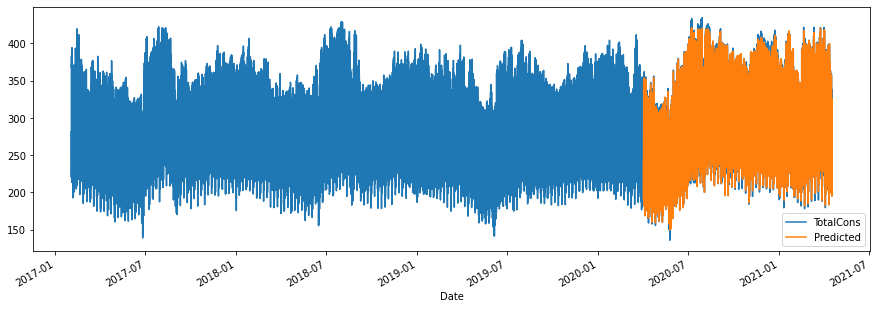

In [497]:
_ = df_all[['TotalCons','Predicted']].plot(figsize=(15, 5))

##### test date range : 2020-04-01 01:00:00 to 2021-04-17 23:00:00

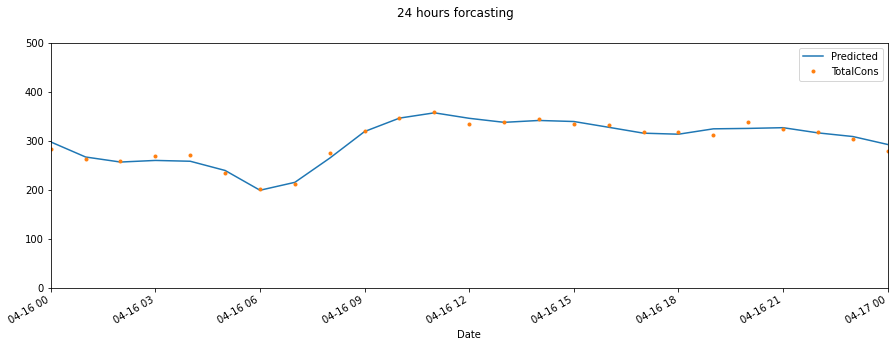

In [508]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['Predicted','TotalCons']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='2021-04-16', upper='2021-04-17')
ax.set_ylim(0, 500)
plot = plt.suptitle('24 hours forcasting') # Last 24 hours

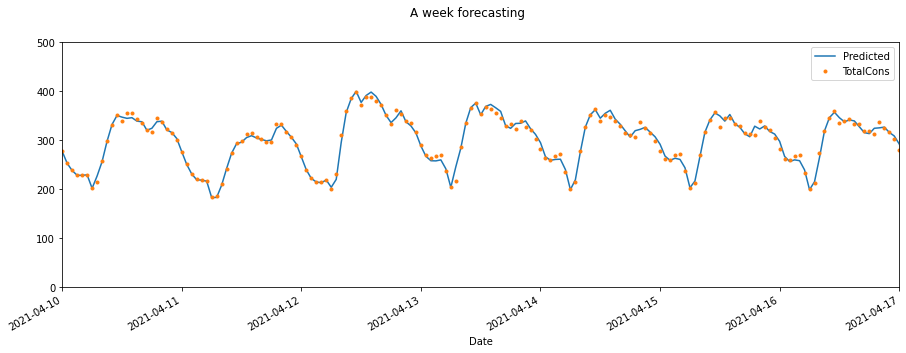

In [509]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['Predicted','TotalCons']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='2021-04-10', upper='2021-04-17')
ax.set_ylim(0, 500)
plot = plt.suptitle('A week forecasting')

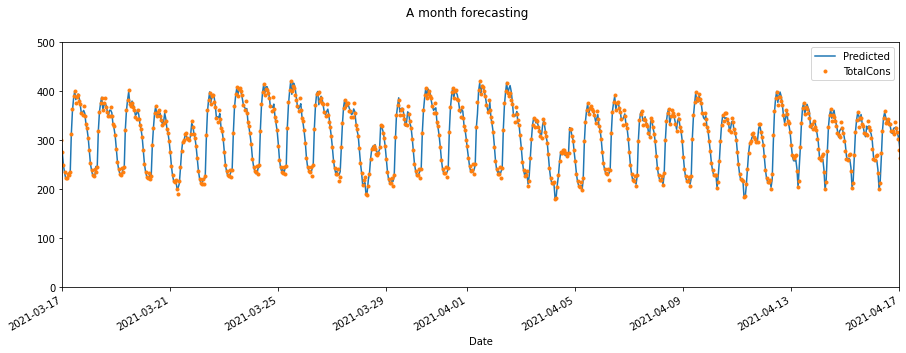

In [516]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = df_all[['Predicted','TotalCons']].plot(ax=ax,
                                              style=['-','.'])
ax.set_xbound(lower='2021-03-17', upper='2021-04-17')
ax.set_ylim(0, 500)
plot = plt.suptitle('A month forecasting')

#### Tree Plots

In [34]:
import lightgbm as lgb

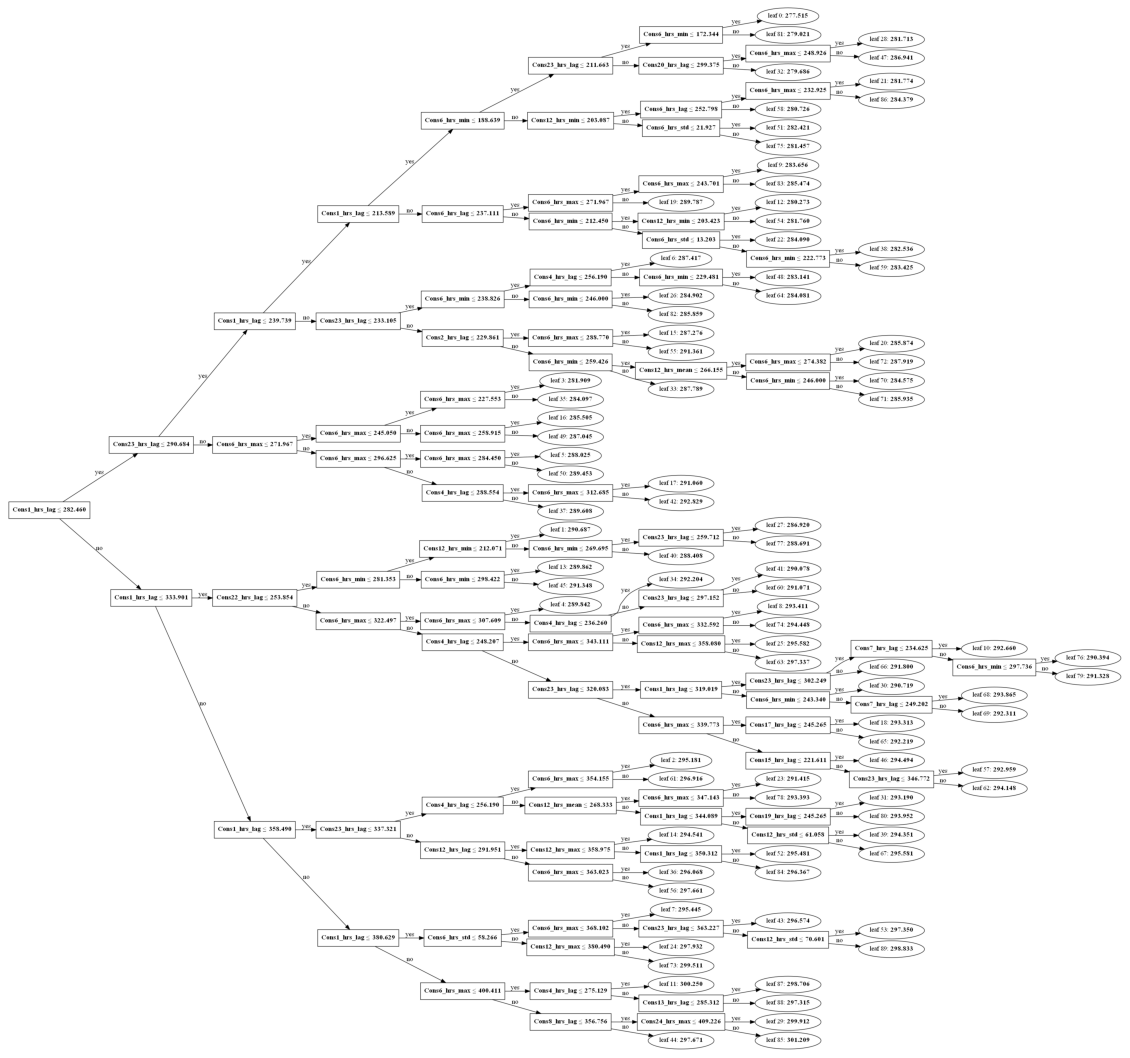

In [517]:
fig = plt.figure(figsize=(20, 20))
ax = fig.subplots()
lgb.plot_tree(lgb_model, tree_index=0, ax=ax)
plt.show()

In [35]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

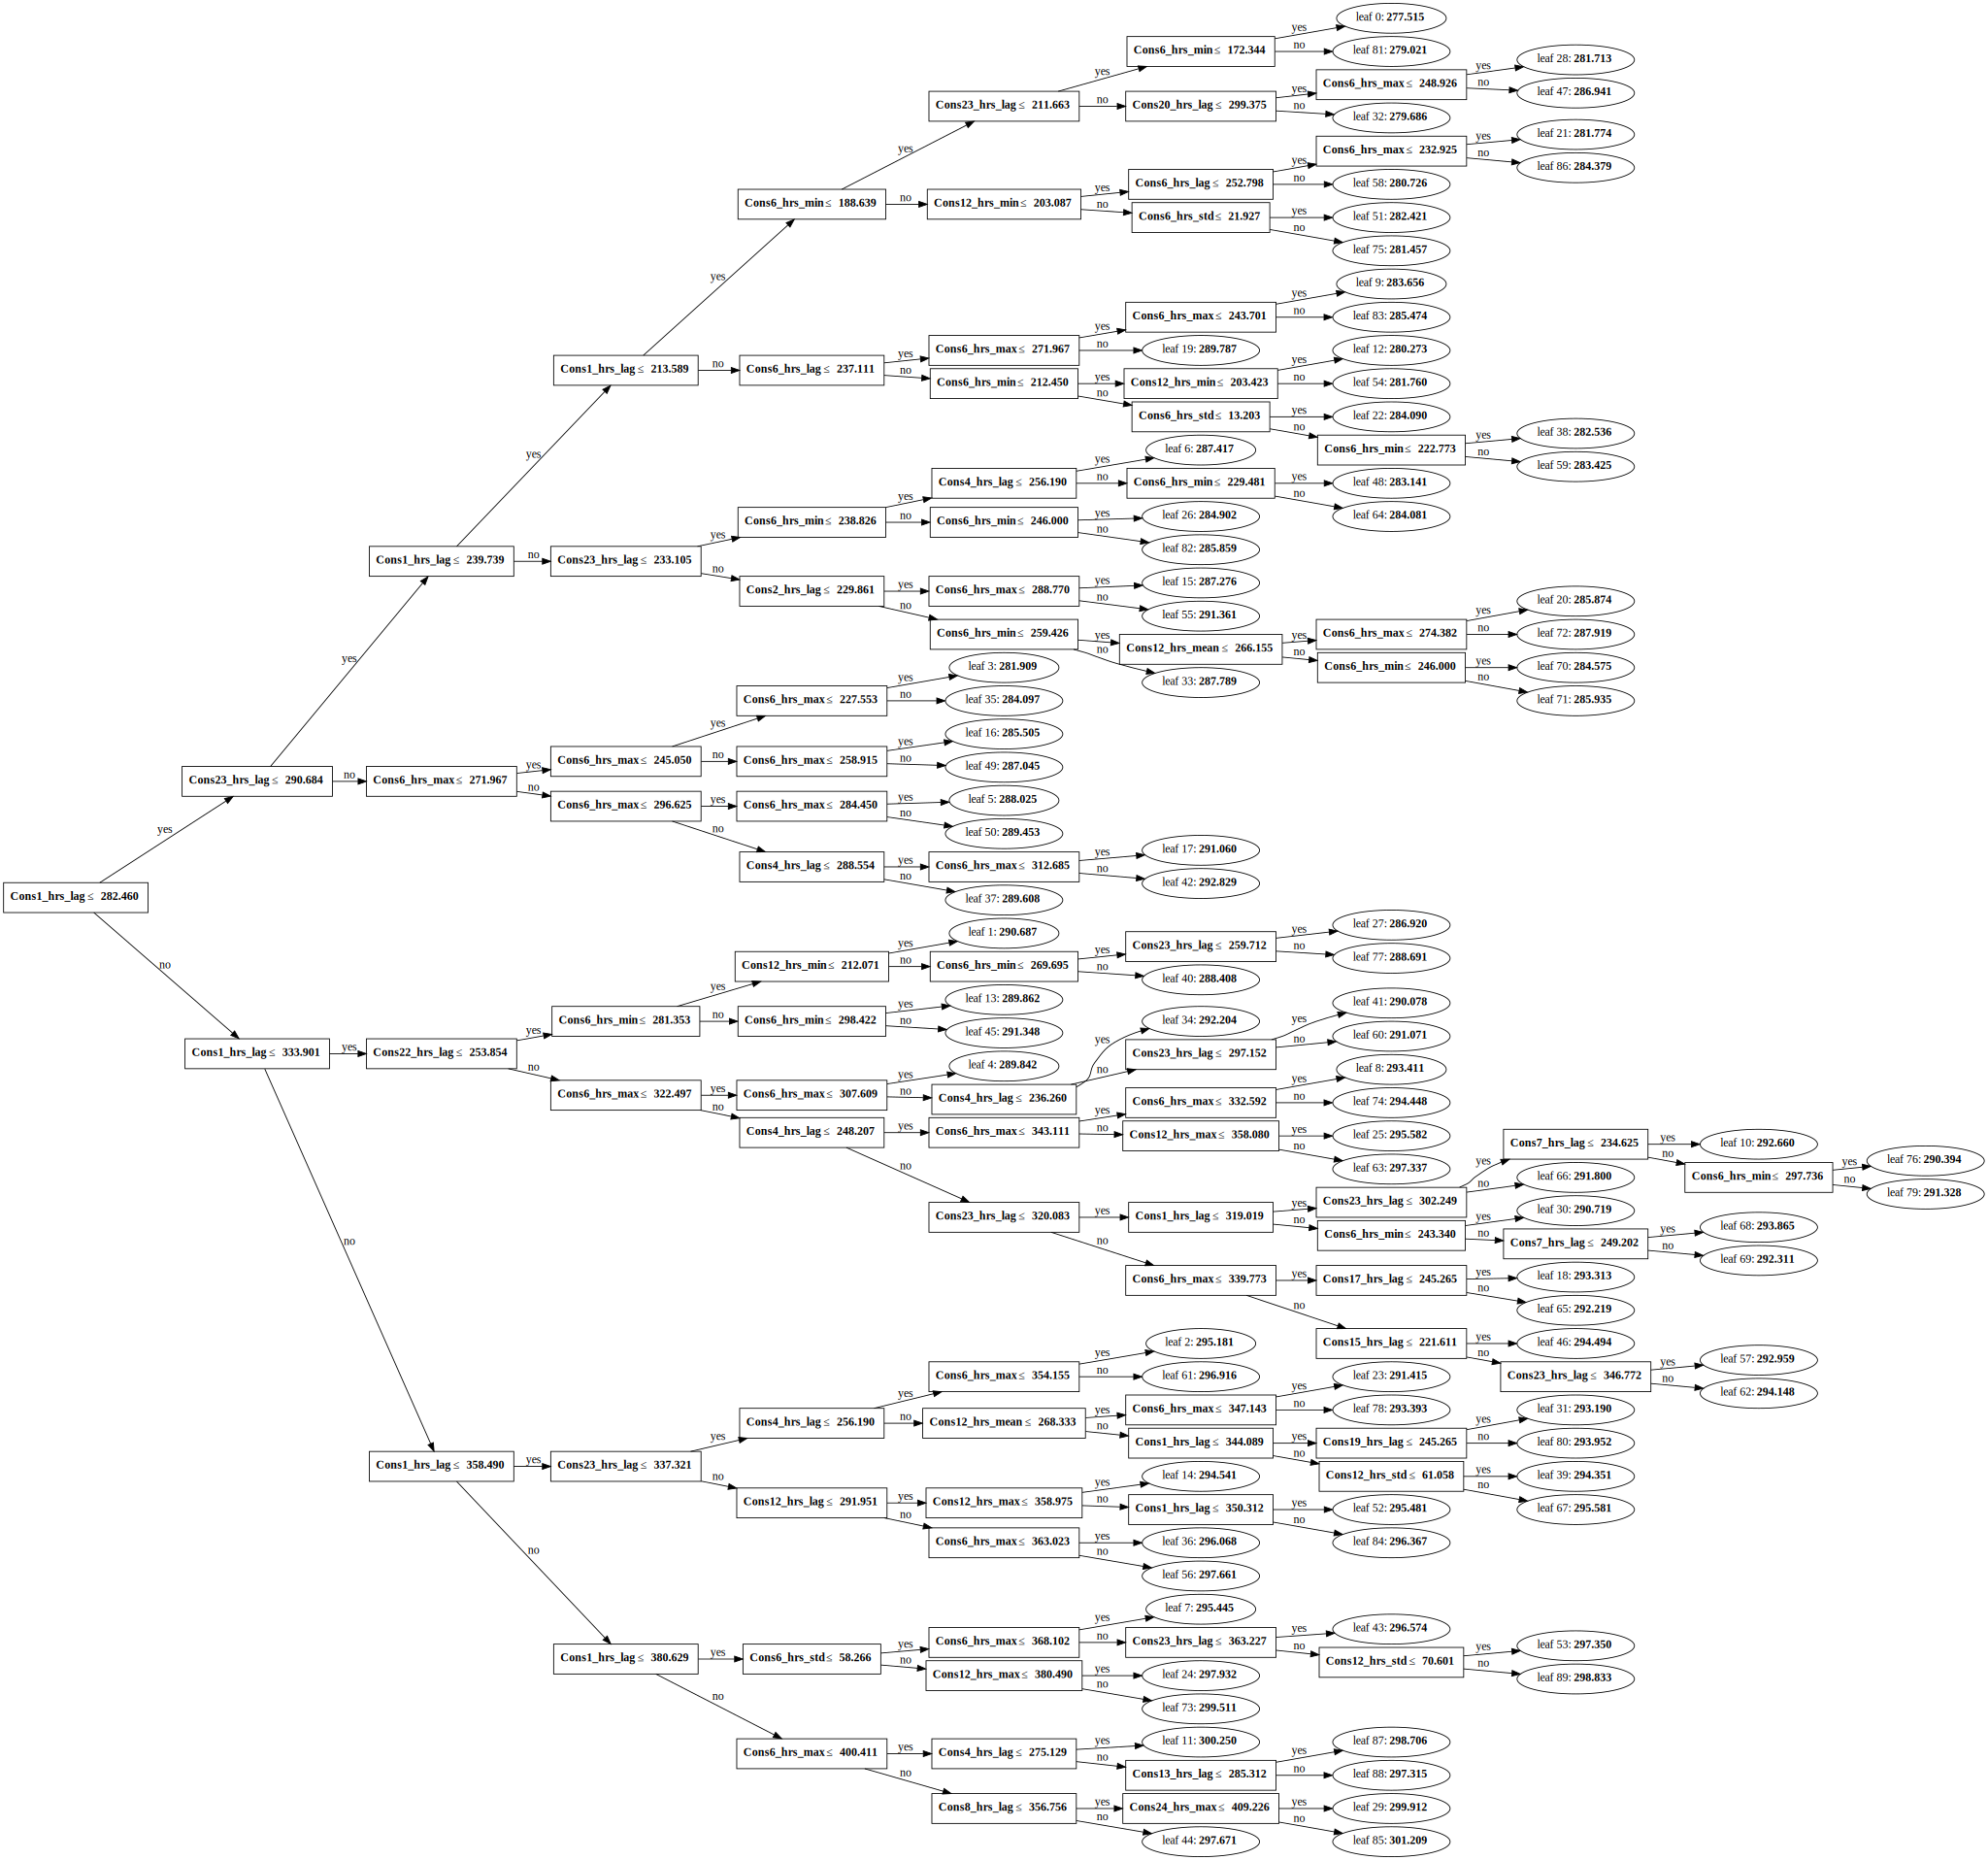

In [519]:
lgb.create_tree_digraph(lgb_model)

#### Feature Importance Visualization with Shap

In [36]:
import shap

In [368]:
# DF, based on which importance is checked
X_importance = X_test

# Explain model predictions using shap library:
explainer = shap.TreeExplainer(lgb_model)
shap_values = explainer.shap_values(X_importance)

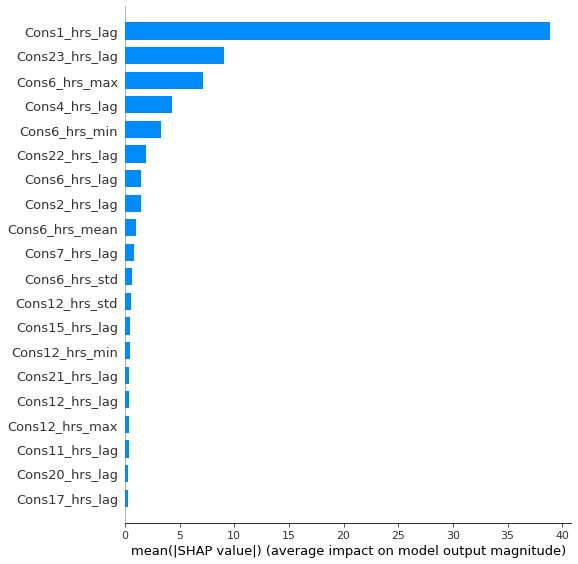

In [369]:
shap.summary_plot(shap_values, X_importance, plot_type='bar')

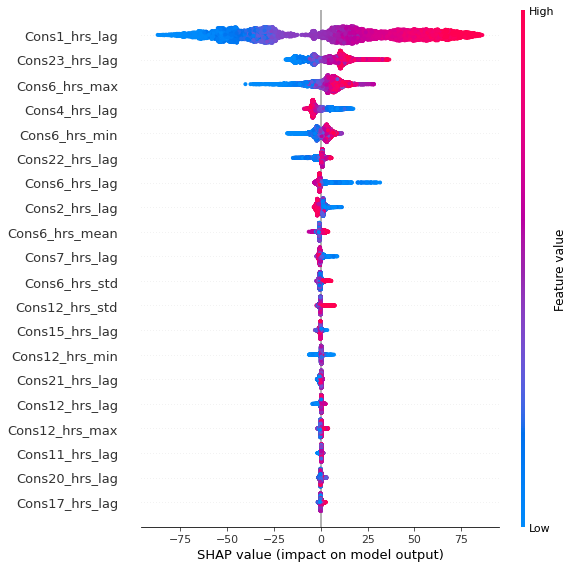

In [370]:
shap.summary_plot(shap_values, features=X_importance, feature_names=X_importance.columns)